<a href="https://colab.research.google.com/github/sinheechan/ML/blob/main/%5BDataset%5D_%EB%B6%84%EB%A5%98%EC%8B%A4%EC%8A%B5_%EC%82%B0%ED%83%84%EB%8D%B0%EB%A5%B4_%EA%B3%A0%EA%B0%9D%EB%A7%8C%EC%A1%B1%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 여행객 대상 스페인 도시의 만족도

## 1. 초기 설정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

## 2. 데이터 불러오기

In [2]:
# 0 : 만족 / 1: 불만족

cust_df = pd.read_csv("./train_santander.csv", encoding='latin-1')

print('dataset shape:', cust_df.shape)

dataset shape: (76020, 371)


## 3. EDA

In [3]:
cust_df.head(3)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [4]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


- 데이터셋에서 타겟 변수의 값에 따라 레이블의 빈도를 계산하고, 불만족스러운 고객의 비율을 계산한다.

In [5]:
print(cust_df['TARGET'].value_counts())

unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()

print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [6]:
cust_df.describe()

# 데이터 구간 중 -9999999는 이상하다 = 오류

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [7]:
cust_df['var3'].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: var3, Length: 208, dtype: int64

- 데이터의 빈도 분석 결과 불만족으로 치우친 데이터셋이다

## 4. 데이터 전처리

- 불필요한 칼럼 Drop

In [8]:
cust_df.drop('ID', axis=1, inplace=True)

- var3 피처의 값 중 -999999를 2로 대체한다.

In [9]:
cust_df['var3'].replace(-999999, 2, inplace=True)

- 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리한다.

In [10]:
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]

print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


## 5. 머신러닝

- 데이터를 train, test 데이터셋으로 분리하고 비슷한 분포로 분리되었는지 확인한다.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=2024)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960011
1    0.039989
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.962115
1    0.037885
Name: TARGET, dtype: float64


- X_train, y_train을 다시 학습과 검증 데이터 세트로 분리한다.

In [12]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,
                                                    test_size=0.3, random_state=0)

print(len(X_tr), len(y_tr))
print(len(X_val), len(y_val))

42571 42571
18245 18245


### 5.1 XGBoost

- XGBoost 모델 학습과 하이퍼 파라미터 튜닝을 실시한다.
- XGBoost 분류기를 초기화하고 학습한 후, 테스트 데이터에 대한 ROC AUC를 계산하여 출력한다.

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, learning_rate 0.05, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정.
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행.
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

- 결과값 : ROC AUC: 0.8238 이 도출되었다.

- Hyperopt를 사용하여 XGBoost 모델의 하이퍼파라미터 탐색 공간을 정의하여 최적의 하이퍼파라미터 값을 도출한다.

- 칼럼의 개수가 많으므로 과적합 가능성을 가정하고, max_depth, min_child_weigh, colsample_bytree 하이퍼 파라미터만 일차 튜닝 대상으로 지정한다.
- 학습 시간이 많이 필요한 ML모델인 경우 하이퍼 파라미터 튜닝을 수행하는 요령 중 첫 번째는 먼저 2~3개 정도의 파라미터를 결합해 최적 파라미터를 찾아낸 뒤에 이 최적 파라미터를 기반으로 다시 1~2개 파라미터를 결합해 파라미터 튜닝을 수행한다.

In [18]:
from sklearn.model_selection import GridSearchCV
xgb_clf = XGBClassifier(n_estimators=100)
params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5, 0.75]}
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

print(gridcv.best_params_)
xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print(xgb_roc_score)

[0]	validation_0-auc:0.81851	validation_1-auc:0.78608
[1]	validation_0-auc:0.81308	validation_1-auc:0.78217
[2]	validation_0-auc:0.81220	validation_1-auc:0.78035
[3]	validation_0-auc:0.80979	validation_1-auc:0.77933
[4]	validation_0-auc:0.83465	validation_1-auc:0.80450
[5]	validation_0-auc:0.84369	validation_1-auc:0.81144
[6]	validation_0-auc:0.84922	validation_1-auc:0.81623
[7]	validation_0-auc:0.84898	validation_1-auc:0.81581
[8]	validation_0-auc:0.85387	validation_1-auc:0.81853
[9]	validation_0-auc:0.85406	validation_1-auc:0.81975
[10]	validation_0-auc:0.85457	validation_1-auc:0.81808
[11]	validation_0-auc:0.85820	validation_1-auc:0.81924
[12]	validation_0-auc:0.86029	validation_1-auc:0.82164
[13]	validation_0-auc:0.86204	validation_1-auc:0.82210
[14]	validation_0-auc:0.86285	validation_1-auc:0.82173
[15]	validation_0-auc:0.86323	validation_1-auc:0.82229
[16]	validation_0-auc:0.86447	validation_1-auc:0.82186
[17]	validation_0-auc:0.86588	validation_1-auc:0.82127
[18]	validation_0-au

- {'colsample_bytree': 0.75, 'max_depth': 7, 'min_child_weight': 3}
- 0.8269 로 이전과 별 차이 없다.


- 피처 중요도를 시각화한다.

[0]	validation_0-auc:0.82581	validation_1-auc:0.79796
[1]	validation_0-auc:0.82906	validation_1-auc:0.79985
[2]	validation_0-auc:0.82294	validation_1-auc:0.79157
[3]	validation_0-auc:0.84095	validation_1-auc:0.80529
[4]	validation_0-auc:0.83773	validation_1-auc:0.80116
[5]	validation_0-auc:0.84614	validation_1-auc:0.80776
[6]	validation_0-auc:0.84458	validation_1-auc:0.80620
[7]	validation_0-auc:0.85239	validation_1-auc:0.81518
[8]	validation_0-auc:0.85341	validation_1-auc:0.81403
[9]	validation_0-auc:0.85380	validation_1-auc:0.81318
[10]	validation_0-auc:0.85830	validation_1-auc:0.81798
[11]	validation_0-auc:0.85953	validation_1-auc:0.81697
[12]	validation_0-auc:0.86137	validation_1-auc:0.81555
[13]	validation_0-auc:0.86190	validation_1-auc:0.81555
[14]	validation_0-auc:0.86514	validation_1-auc:0.81756
[15]	validation_0-auc:0.86566	validation_1-auc:0.81732
[16]	validation_0-auc:0.86618	validation_1-auc:0.81702
[17]	validation_0-auc:0.86845	validation_1-auc:0.81912
[18]	validation_0-au

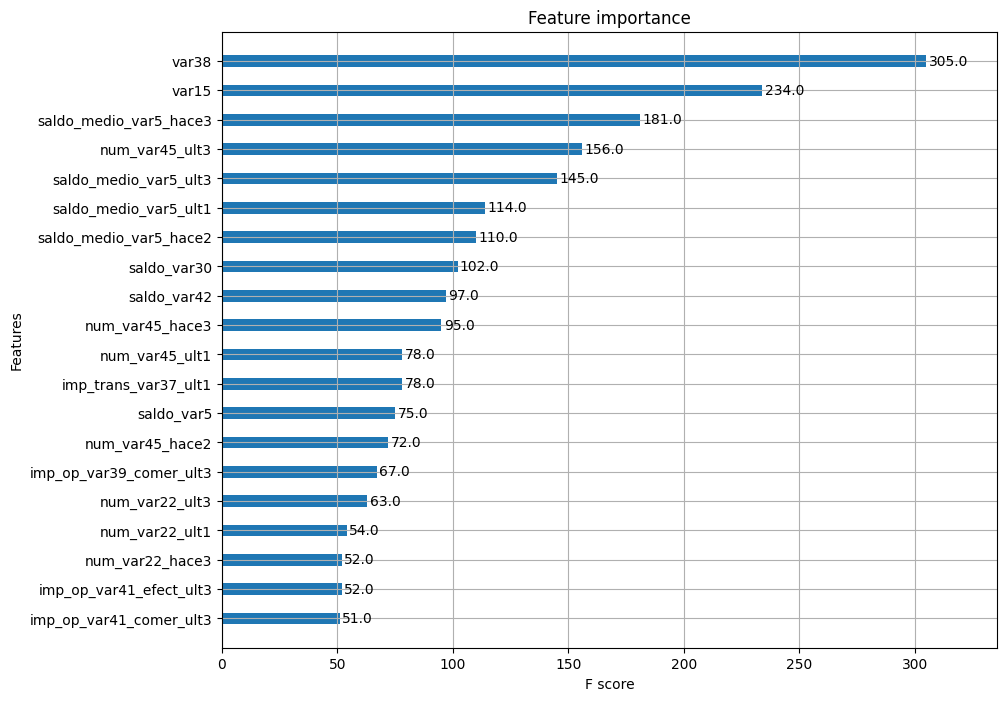

In [19]:
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, colsample_bytree=0.5, max_depth=5, min_child_weight=3)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print(xgb_roc_score)

from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)
plt.show()

최종적으로 xgb_roc_score 는 82.25% 값이 도출되었다.